In [1]:
import os
import importlib
from timeit import timeit
import logging
import sys
import importlib
import time
import multiprocessing as mp
import multiprocessing.pool

import numpy as np
print("test5")
import pandas as pd
import scipy
import h5py
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
import numba
import sklearn.linear_model

from ion_networks import ms_utils
from ion_networks import browser
from ion_networks import interface
from ion_networks import ms_database
from ion_networks import ms_run_files

import sandbox

# import line_profiler
# profile = line_profiler.LineProfiler()
# heat.evolve = profile(heat.evolve)
# profile.print_stats()

def reload():
    importlib.reload(ms_run_files)
    importlib.reload(ms_utils)
    importlib.reload(browser)
    importlib.reload(interface)
    importlib.reload(sandbox)
    importlib.reload(ms_database)
   

test5


In [2]:
reload()

inets = []
evis = []
anis = []
# in_folder = "/home/sander/Documents/Proteomics/data/ion_networks"
in_folder = "/Users/swillems/Data/ion_networks/ecoli"
# in_folder = "/home/sander/Documents/Proteomics/data/jpt/APEX"
for file_name in ms_utils.get_file_names_with_extension([in_folder], ".inet.hdf"):
    inets.append(
        ms_run_files.HDF_Network_File(
            file_name
        )
    )
    evis.append(
        ms_run_files.HDF_Evidence_File(
            file_name
        )
    )
#     anis.append(
#         ms_run_files.HDF_Annotation_File(
#             file_name
#         )
#     )

In [7]:
other_evi.run_name

'28Oct2016_063'

In [8]:
self_inet = inets[2]
self_evi = evis[2]
other_inet = inets[3]
other_evi = evis[3]

self_alignment = self_evi.get_nodes(
    other_evi,
    return_as_mask=False
)
other_alignment = other_evi.get_nodes(
    self_evi,
    return_as_mask=False
)
# other_logints = inets[other_name].get_ion_coordinates(
#     "FRAGMENT_LOGINT",
#     indices=other_alignment
# )
# logints[i, self_alignment] = other_logints
self_alignment.shape, other_alignment.shape

((442288,), (442288,))

In [9]:
self_alignment

array([ 553962, 1671950, 1222924, ..., 1355206, 1267299, 1315103])

In [11]:
other_alignment

array([ 555096, 1663193, 1229947, ..., 1353784, 1266632, 1305263])

In [18]:
self_inet.get_ion_coordinates("PRECURSOR_DT", [553962, 1671950, 1222924])

array([65.044, 43.933, 60.396])

In [19]:
other_inet.get_ion_coordinates("PRECURSOR_DT", [555096, 1663193, 1229947])

array([63.024, 42.159, 60.6  ])

<IPython.core.display.Javascript object>


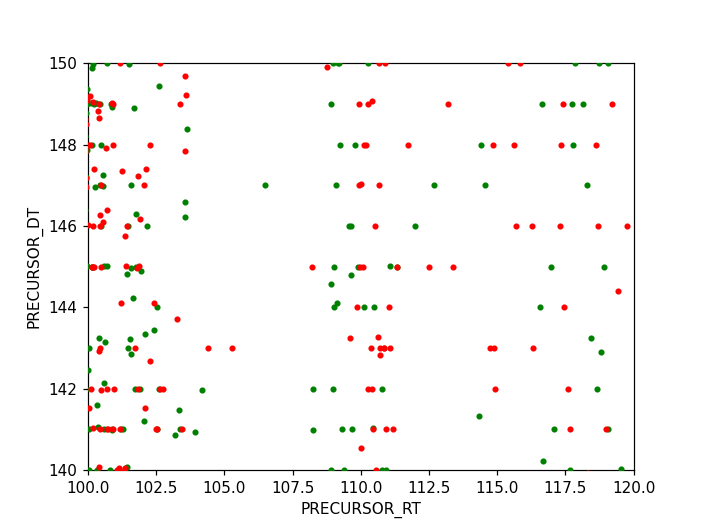

(140.0, 150.0)

In [20]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ind_start = 0
ind_size = len(self_alignment)

a1 = self_inet.get_ion_coordinates("PRECURSOR_RT", indices = self_alignment[ind_start: ind_start+ind_size])
b1 = self_inet.get_ion_coordinates("PRECURSOR_DT", indices = self_alignment[ind_start: ind_start+ind_size])
a2 = other_inet.get_ion_coordinates("PRECURSOR_RT", indices = other_alignment[ind_start: ind_start+ind_size])
b2 = other_inet.get_ion_coordinates("PRECURSOR_DT", indices = other_alignment[ind_start: ind_start+ind_size])
m1 = self_inet.get_ion_coordinates("FRAGMENT_MZ", indices = self_alignment[ind_start: ind_start+ind_size])
m2 = other_inet.get_ion_coordinates("FRAGMENT_MZ", indices = other_alignment[ind_start: ind_start+ind_size])



start_edges = list(zip(a1, b1))
end_edges = list(zip(a2, b2))
# colors = positive_counts[selection] - negative_counts[selection]
edges = np.array(list(zip(start_edges, end_edges)))


ax.scatter(a1, b1, c="g", marker=".", zorder=10)
ax.scatter(a2, b2, c="r", marker=".", zorder=10)



ax.set_xlabel("PRECURSOR_RT")
ax.set_ylabel("PRECURSOR_DT")

xlim = (100, 120)
ylim = (140, 150)

plt.xlim(xlim)
plt.ylim(ylim)
# sns.jointplot(a1[ind_start: ind_start+ind_size], a2[ind_start: ind_start+ind_size], kind="kde",gridsize=100)

<IPython.core.display.Javascript object>


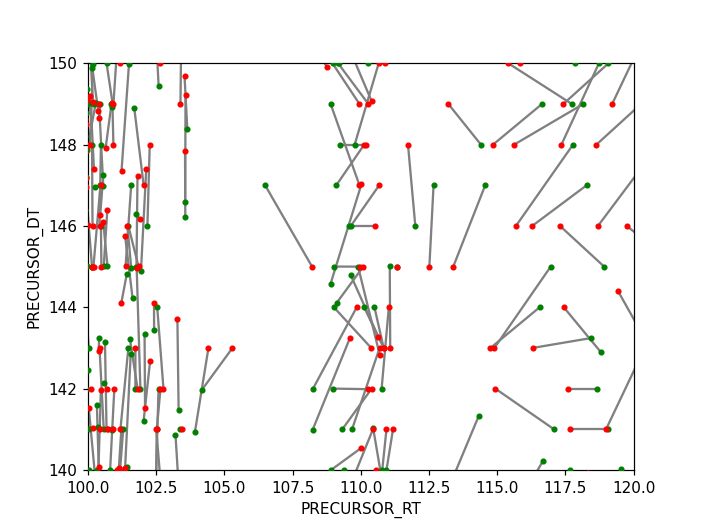

(140.0, 150.0)

In [21]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ind_start = 0
ind_size = len(self_alignment)


x = ax.add_collection(
    matplotlib.collections.LineCollection(edges),
)
x.set_color("grey")
# ax.scatter(a1[:], b1[:], c=m1[:], cmap="RdYlGn", marker="o", zorder=10)
# ax.scatter(a2[:], b2[:], c=m2[:], cmap="RdYlGn", marker="x", zorder=10)
ax.scatter(a1, b1, c="g", marker=".", zorder=10)
ax.scatter(a2, b2, c="r", marker=".", zorder=10)



ax.set_xlabel("PRECURSOR_RT")
ax.set_ylabel("PRECURSOR_DT")

xlim = (100, 120)
ylim = (140, 150)

plt.xlim(xlim)
plt.ylim(ylim)
# sns.jointplot(a1[ind_start: ind_start+ind_size], a2[ind_start: ind_start+ind_size], kind="kde",gridsize=100)

<IPython.core.display.Javascript object>


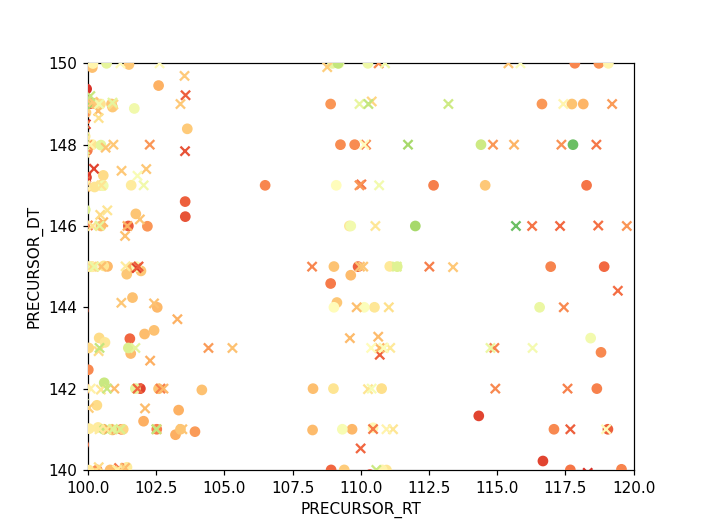

(140.0, 150.0)

In [22]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)



ax.scatter(a1[:], b1[:], c=m1[:], cmap="RdYlGn", marker="o", zorder=10)
ax.scatter(a2[:], b2[:], c=m2[:], cmap="RdYlGn", marker="x", zorder=10)



ax.set_xlabel("PRECURSOR_RT")
ax.set_ylabel("PRECURSOR_DT")
plt.xlim(xlim)
plt.ylim(ylim)

# sns.jointplot(a1[ind_start: ind_start+ind_size], a2[ind_start: ind_start+ind_size], kind="kde",gridsize=100)

<IPython.core.display.Javascript object>


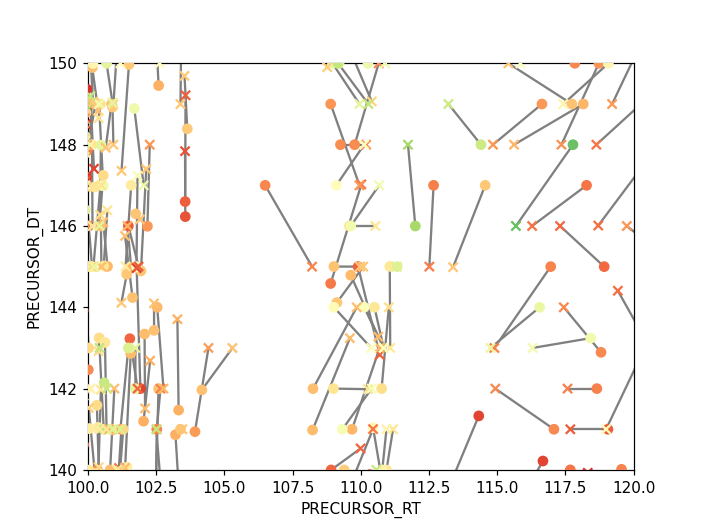

(140.0, 150.0)

In [24]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)



x = ax.add_collection(
    matplotlib.collections.LineCollection(edges),
)
x.set_color("grey")
ax.scatter(a1[:], b1[:], c=m1[:], cmap="RdYlGn", marker="o", zorder=10)
ax.scatter(a2[:], b2[:], c=m2[:], cmap="RdYlGn", marker="x", zorder=10)



ax.set_xlabel("PRECURSOR_RT")
ax.set_ylabel("PRECURSOR_DT")
plt.xlim(xlim)
plt.ylim(ylim)

# sns.jointplot(a1[ind_start: ind_start+ind_size], a2[ind_start: ind_start+ind_size], kind="kde",gridsize=100)